In [45]:
import os
import numpy as np

real_path = "./groundtruth/npy"
predict_path = "./mydata/npy"

## 1. Ground Truth

In [52]:
names = [f[:-4] for f in sorted(os.listdir(real_path))]

real_files = [os.path.join(real_path, f) for f in sorted(os.listdir(real_path))]
predict_files = [os.path.join(predict_path, f) for f in sorted(os.listdir(predict_path))]

In [49]:
assert len(real_files) == len(predict_files)

In [64]:
n_frames = 88
real_clip = []
predict_clip = []

for i, name in enumerate(names):
    
    real_npy = np.load(real_files[i])
    predict_npy = np.load(predict_files[i])
    print(f"{name}: [{np.shape(real_npy)}], [{np.shape(predict_npy)}]")
        
    length = min(real_npy.shape[0], predict_npy.shape[0])
    n_subdivision = int(length//n_frames)
    
    print(f"{length} -> {n_subdivision} * {n_frames}")
    
    for division in range(n_subdivision):
        real_clip.append(real_npy[division*n_frames:(division+1)*n_frames])
        predict_clip.append(predict_npy[division*n_frames:(division+1)*n_frames])

print(f"real_clip: {np.shape(real_clip)}")
print(f"predict_clip: {np.shape(predict_clip)}")
    

001_Neutral_0_x_1_0: [7286], [7176]
7176 -> 81 * 88
003_Neutral_2_x_1_0: [7799], [7656]
7656 -> 87 * 88
006_Sad_0_x_1_0: [8346], [8136]
8136 -> 92 * 88
008_Sad_2_x_1_0: [9608], [9576]
9576 -> 108 * 88
011_Happy_0_x_1_0: [7869], [7656]
7656 -> 87 * 88
013_Happy_2_x_1_0: [7384], [7176]
7176 -> 81 * 88
016_Relaxed_0_x_1_0: [7922], [7896]
7896 -> 89 * 88
018_Relaxed_2_x_1_0: [7362], [7176]
7176 -> 81 * 88
021_Old_0_x_1_0: [8616], [8376]
8376 -> 95 * 88
023_Old_2_x_1_0: [9297], [9096]
9096 -> 103 * 88
026_Angry_0_x_1_0: [7760], [7656]
7656 -> 87 * 88
028_Angry_2_x_1_0: [6721], [6696]
6696 -> 76 * 88
real_clip: (1067, 88, 1141)
predict_clip: (1067, 88, 1141)


In [63]:
print(np.shape(real_clip))
np.shape(predict_clip)

(1067, 88, 1141)


(1067, 88, 1141)

In [66]:
np.savez_compressed('./data/real_dataset.npz', gesture=real_clip)

In [67]:
np.savez_compressed('./data/predict_dataset.npz', gesture=predict_clip)

In [28]:
for file in real_files:
    npy_file = np.load(file)
    name = file.split("/")[-1][:-4]
    print(name, "\t", npy_file.shape)
    

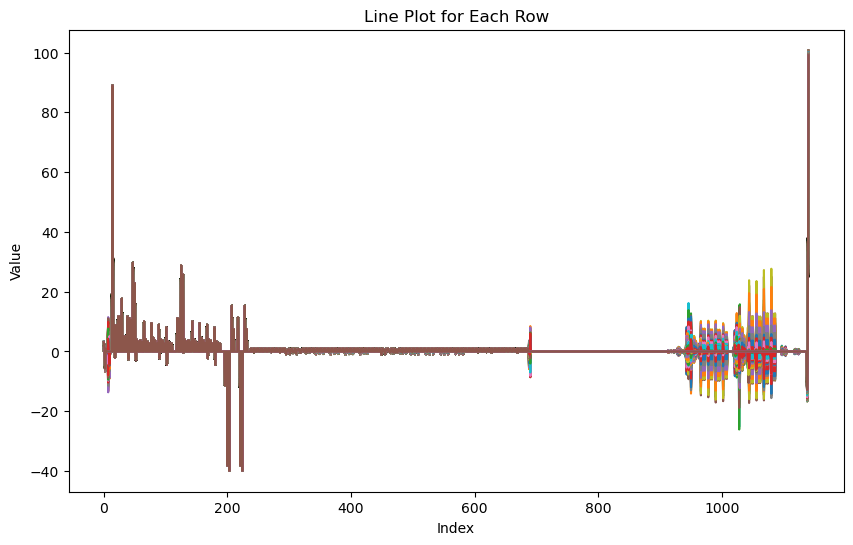

In [38]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# for i in range(data.shape[0]):
plt.plot(data)  # Label only first 5 rows for clarity
plt.title("Line Plot for Each Row")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

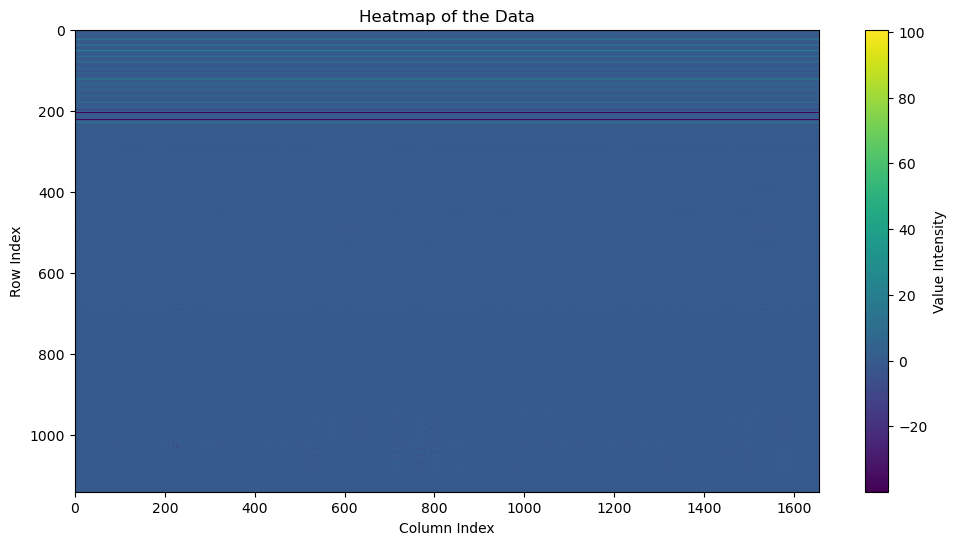

In [39]:
# Heatmap representation
plt.figure(figsize=(12, 6))
plt.imshow(data, aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar(label='Value Intensity')
plt.title("Heatmap of the Data")
plt.xlabel("Column Index")
plt.ylabel("Row Index")
plt.show()

In [40]:
def list_npy(npy_path):
    npy_files = [os.path.join(npy_path, npy) for npy in os.listdir(npy_path)]
    return npy_files


['./groundtruth/npy/006_Sad_0_x_1_0.npy',
 './groundtruth/npy/003_Neutral_2_x_1_0.npy',
 './groundtruth/npy/018_Relaxed_2_x_1_0.npy',
 './groundtruth/npy/013_Happy_2_x_1_0.npy',
 './groundtruth/npy/021_Old_0_x_1_0.npy',
 './groundtruth/npy/016_Relaxed_0_x_1_0.npy',
 './groundtruth/npy/028_Angry_2_x_1_0.npy',
 './groundtruth/npy/011_Happy_0_x_1_0.npy',
 './groundtruth/npy/026_Angry_0_x_1_0.npy',
 './groundtruth/npy/023_Old_2_x_1_0.npy',
 './groundtruth/npy/001_Neutral_0_x_1_0.npy',
 './groundtruth/npy/008_Sad_2_x_1_0.npy']

In [44]:
mean_vec = np.array(
            [0.01855118070268579, -0.1013322468846258, 0.08283318522940754, 0.01855118070268579, 182.54484156276828, 0.08283318522940754, 0.35416695870276377, 186.68091329162775, -6.3118445570050445, 1.3143240114748138, 208.66832174324736, -4.261926167518727, 2.080280203610869, 229.51662355065372, -12.274310672197933, 2.747281942064785, 266.0706399098627, -16.448003301573394, 3.1459839022120244, 291.5177753558705, -10.492305344072886, 3.4366581796979148, 303.9450667015394, -4.166701483381484,
             -2.157822697191497, 280.6766966372547, 1.3016120858482165, -33.915650414979325, 278.3425489365996, -7.857284363684172, -34.75230898936223, 270.16624429917937, -8.33175168601516, -34.75230898936223, 270.16624429917937, -8.33175168601516, -43.668024861185906, 221.27271982813915, -0.1946196412603046, -50.742117633081094, 191.19445966969863, 24.00335486713785, -48.61083207467266, 189.37390388270728, 27.078022509963724, -47.290417670537025, 179.8943203750877, 36.8866407849576,
             -48.11218816257794, 173.76535301149983, 38.03657590004193, -46.95958063987163, 170.846477306871, 36.90238887289396, -53.569113667176865, 179.76709799379563, 34.03215922679267, -53.44144541233228, 173.3768409377897, 33.2551234065568, -51.62412431579906, 170.0636317076318, 31.314338860028588, -50.96893111644582, 179.92625777511927, 36.13865433055161, -51.13066680801512, 172.77549730500658, 35.42082909407341, -48.867083247041315, 169.74849040715324, 33.2720614863769,
             -55.51287622768536, 179.43790411890703, 31.39773750037596, -57.34440757776708, 174.77451931256542, 32.43167126863285, -56.604966673619266, 171.9564091422062, 31.47753036449538, -47.44861215834778, 188.15637666520232, 28.129024597033354, -43.55625468665575, 185.47388611507412, 27.758374254086043, -41.38199267851365, 180.42104207281443, 30.551513582140757, -41.691166629453335, 175.90447296043635, 33.04638334707732, 8.854384931033676, 280.57830991801933, 0.9996880195461864,
             40.20013135374427, 278.44674967572644, -9.592326671467355, 40.89415682483461, 270.1516950586752, -10.15633373951769, 40.89415682483461, 270.1516950586752, -10.15633373951769, 51.41500406841752, 221.70370614542432, -2.6006996477813753, 54.916744401223745, 194.5284763365179, 24.311837550207308, 52.31299778157673, 192.81266112279957, 26.82634961566674, 51.005423640290964, 191.68991603881014, 27.502150006608233, 47.555715817790315, 189.24028792058152, 26.238805399109506,
             45.18781599616401, 184.54008965581176, 28.233225742698068, 44.39069379886114, 180.45138453138327, 30.530440578637357, 49.108875457922736, 184.02753569584522, 35.70645047087024, 49.90993964505174, 178.3885187020955, 36.84489606195685, 49.307812642760325, 175.7841518499736, 35.57328214365982, 52.82784436525587, 184.04666654777262, 36.080429403581824, 52.967532008378505, 177.7675448820657, 35.25556966590845, 51.65711416629565, 175.27654226196464, 32.718515505034006, 55.884237353078916,
             183.90380449262895, 34.959872588070354, 56.030035530947885, 178.02777481146896, 34.671341338435475, 55.09303635629753, 174.87312861774282, 32.75722625861553, 58.46223556189697, 183.61085660188184, 33.19737390418257, 59.8327591426162, 179.22367432704505, 34.806910217356176, 59.45952664499003, 176.66793963961754, 33.844020088240285])
        

In [45]:
np.shape(mean_vec)

(162,)